In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("F:\DCS-SEM 5\HR Lab\Ex3.xlsx" , sheet_name = "Data" , header = 1 )
df.head()

,Id,Name,Age,Position,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,1,Emily Smith,32,Manager,1,3,4,3,5,5,4,1,2,1,4,3,4,2,4,1
1,2,Liam Johnson,27,Analyst,3,2,5,5,1,5,1,3,4,5,5,5,1,5,1,5
2,3,Olivia Brown,38,Employee,4,5,5,3,1,2,1,5,1,2,2,5,3,5,5,2
3,4,Noah Davis,36,Supervisor,4,3,1,4,2,5,4,1,5,5,3,5,3,3,1,2
4,5,Ava Wilson,32,Analyst,3,3,5,5,1,3,2,1,5,3,2,2,3,2,3,4


In [3]:
df.dtypes

Id           int64
Name        object
Age          int64
Position    object
Q1           int64
Q2           int64
Q3           int64
Q4           int64
Q5           int64
Q6           int64
Q7           int64
Q8           int64
Q9           int64
Q10          int64
Q11          int64
Q12          int64
Q13          int64
Q14          int64
Q15          int64
Q16          int64
dtype: object

In [4]:
df.isnull().sum()

Id          0
Name        0
Age         0
Position    0
Q1          0
Q2          0
Q3          0
Q4          0
Q5          0
Q6          0
Q7          0
Q8          0
Q9          0
Q10         0
Q11         0
Q12         0
Q13         0
Q14         0
Q15         0
Q16         0
dtype: int64

In [5]:
df.count()

Id          450
Name        450
Age         450
Position    450
Q1          450
Q2          450
Q3          450
Q4          450
Q5          450
Q6          450
Q7          450
Q8          450
Q9          450
Q10         450
Q11         450
Q12         450
Q13         450
Q14         450
Q15         450
Q16         450
dtype: int64

In [6]:
df_1 = df.drop(['Id' , 'Name' , 'Position' , 'Age'] , axis = 1)
corr = df_1.corr()

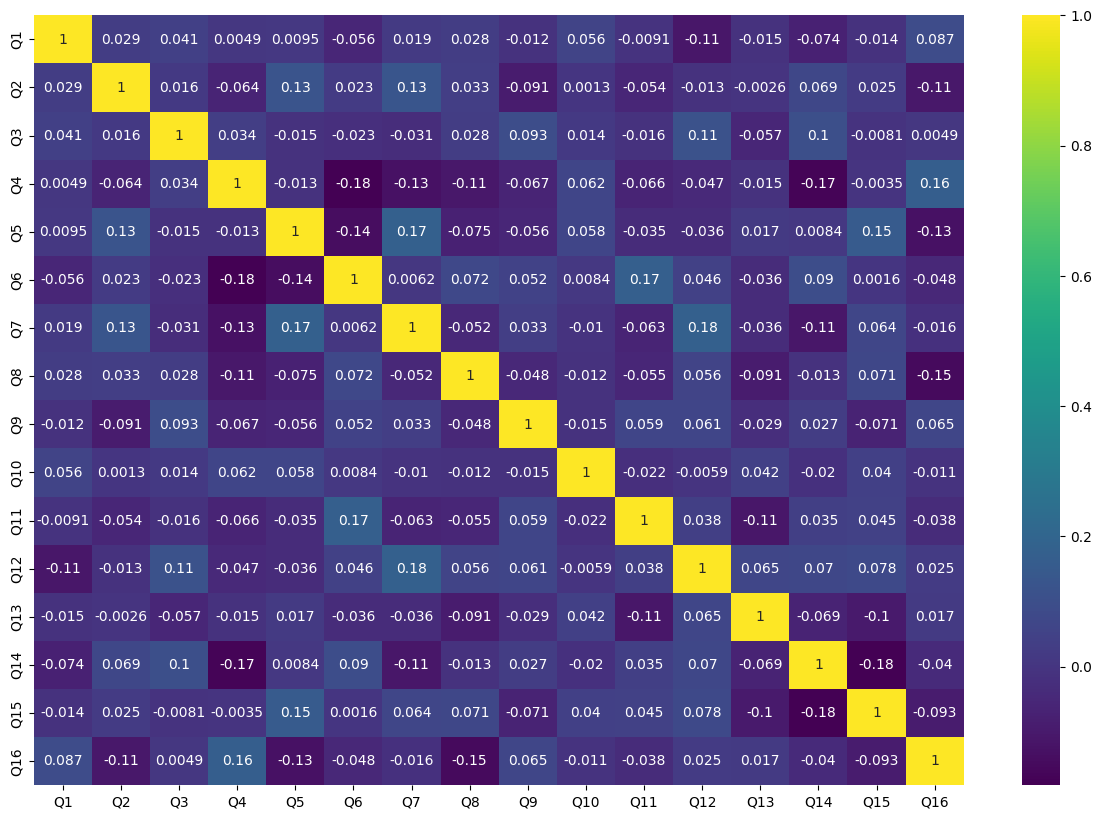

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True ,cmap = 'viridis' )
plt.show()

In [8]:
columns = [df_1.columns[i:i+4] for i in range(0, len(df_1.columns) , 4)]

sums = []
for column in columns:
    sums.append((df_1[column]).sum(axis = 1))

sums_df = pd.concat(sums , axis = 1)
sums_df.columns = ['Employee engangement' , 'Inclusivity and Diversity' , 'Work-life Balance' , 'Professional growth' ] 
data = sums_df
data.head()

,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth
0,11,15,10,11
1,15,10,19,12
2,17,9,10,15
3,12,12,18,9
4,16,7,12,12


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
k_opt = 2
model = KMeans(n_clusters = k_opt , random_state = 42 , n_init = 10)
model.fit(scaled_df)

scaled_data = pd.DataFrame(scaled_data)
data['Satisfication'] = model.labels_
data_res = pd.concat([df[['Id' , 'Name' , 'Age' , 'Position' ]] , data] , axis = 1)
data_res.head()

,Id,Name,Age,Position,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth,Satisfication
0,1,Emily Smith,32,Manager,11,15,10,11,0
1,2,Liam Johnson,27,Analyst,15,10,19,12,0
2,3,Olivia Brown,38,Employee,17,9,10,15,1
3,4,Noah Davis,36,Supervisor,12,12,18,9,0
4,5,Ava Wilson,32,Analyst,16,7,12,12,1


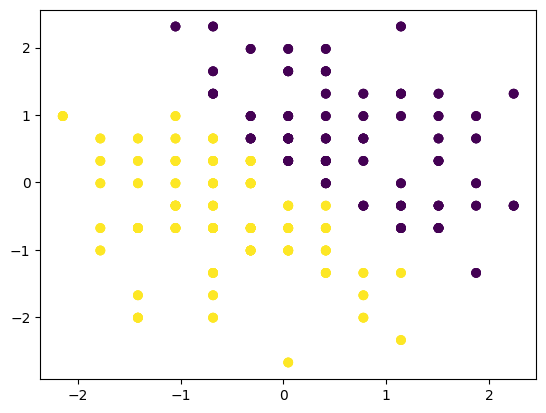

In [10]:
plt.scatter( scaled_data[1], scaled_data[2] , c = data['Satisfication'] , cmap = 'viridis')
plt.show()

In [11]:
data = data_res

In [12]:
data.head()

,Id,Name,Age,Position,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth,Satisfication
0,1,Emily Smith,32,Manager,11,15,10,11,0
1,2,Liam Johnson,27,Analyst,15,10,19,12,0
2,3,Olivia Brown,38,Employee,17,9,10,15,1
3,4,Noah Davis,36,Supervisor,12,12,18,9,0
4,5,Ava Wilson,32,Analyst,16,7,12,12,1


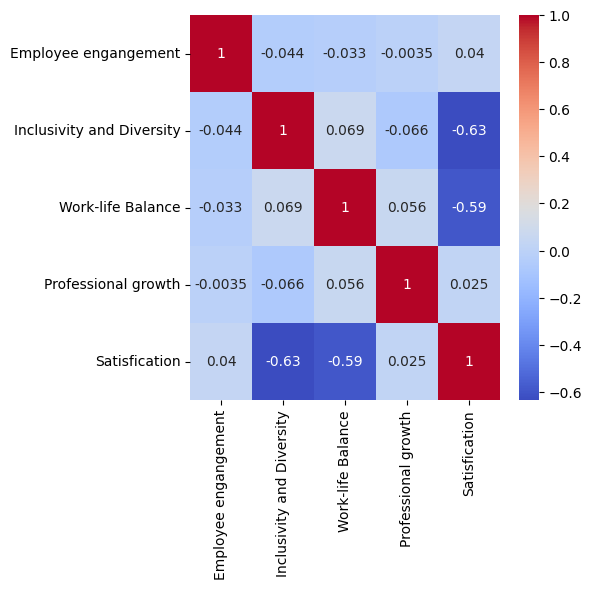

In [13]:
data_corr = data.drop(['Id' , 'Name' , 'Age' , 'Position'] , axis = 1).corr()
plt.figure(figsize = (5 , 5))
sns.heatmap(data_corr , annot = True , cmap = 'coolwarm')
plt.show()

In [14]:
data[['Employee engangement' , 'Inclusivity and Diversity' ,'Work-life Balance',	'Professional growth' ]].groupby(data['Satisfication']).mean()

,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth
Satisfication,,,,
0,12.285714,13.728571,13.942857,11.814286
1,12.512500,10.250000,10.375000,11.937500


In [15]:
data['Position'].groupby(data['Satisfication']).count()

Satisfication
0    210
1    240
Name: Position, dtype: int64

In [16]:
data['Age'].groupby(data['Satisfication']).max()

Satisfication
0    38
1    38
Name: Age, dtype: int64

In [17]:
unsatisfied = data.where(data['Satisfication'] == 0).dropna()
unsatisfied.head()

,Id,Name,Age,Position,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth,Satisfication
0,1.0,Emily Smith,32.0,Manager,11.0,15.0,10.0,11.0,0.0
1,2.0,Liam Johnson,27.0,Analyst,15.0,10.0,19.0,12.0,0.0
3,4.0,Noah Davis,36.0,Supervisor,12.0,12.0,18.0,9.0,0.0
5,6.0,Isabella Lee,31.0,Employee,14.0,11.0,14.0,11.0,0.0
7,8.0,Mia Clark,37.0,Employee,15.0,13.0,15.0,11.0,0.0


In [18]:
unsatisfied[['Employee engangement' , 'Inclusivity and Diversity' ,'Work-life Balance',	'Professional growth' ,'Satisfication']].mean()

Employee engangement         12.285714
Inclusivity and Diversity    13.728571
Work-life Balance            13.942857
Professional growth          11.814286
Satisfication                 0.000000
dtype: float64

In [19]:
pos_count = []
for i in ['Manager' , 'Analyst' , 'Supervisor' , 'Employee']:
    pos_count.append(unsatisfied['Position'].where(unsatisfied['Position'] == i).count())

pos_count = pd.DataFrame({'Position' :['Manager' , 'Analyst' , 'Supervisor' , 'Employee'] , 'Count': pos_count})
pos_count.head()

,Position,Count
0,Manager,15
1,Analyst,15
2,Supervisor,45
3,Employee,135


In [20]:
satisfied = data.where(data['Satisfication'] == 1).dropna()
satisfied.head()

,Id,Name,Age,Position,Employee engangement,Inclusivity and Diversity,Work-life Balance,Professional growth,Satisfication
2,3.0,Olivia Brown,38.0,Employee,17.0,9.0,10.0,15.0,1.0
4,5.0,Ava Wilson,32.0,Analyst,16.0,7.0,12.0,12.0,1.0
6,7.0,Sophia Harris,31.0,Supervisor,10.0,8.0,10.0,13.0,1.0
9,10.0,Amelia Anderson,38.0,Supervisor,12.0,11.0,10.0,10.0,1.0
13,14.0,Michael Jackson,38.0,Manager,19.0,9.0,11.0,10.0,1.0


In [21]:
pos_count = []
for i in ['Manager' , 'Analyst' , 'Supervisor' , 'Employee']:
    pos_count.append(satisfied['Position'].where(satisfied['Position'] == i).count())

pos_count = pd.DataFrame({'Position' :['Manager' , 'Analyst' , 'Supervisor' , 'Employee'] , 'Count': pos_count})
pos_count.head()

,Position,Count
0,Manager,15
1,Analyst,18
2,Supervisor,69
3,Employee,138


In [48]:
data.head()
levels = pd.DataFrame({
    'Employee engagement': [1 if score > data['Employee engangement'].mean() else 0 for score in data['Employee engangement']],
    'Inclusivity and Diversity': [1 if score > data['Inclusivity and Diversity'].mean() else 0 for score in data['Inclusivity and Diversity']],
    'Work-life Balance': [1 if score > data['Work-life Balance'].mean() else 0 for score in data['Work-life Balance']],
    'Professional growth': [1 if score > data['Professional growth'].mean() else 0 for score in data['Professional growth']]
})

levels = pd.concat([data[['Id' , 'Name' , 'Age' , 'Position']] , levels , data['Satisfication']] , axis = 1)
levels.head()

,Id,Name,Age,Position,Employee engagement,Inclusivity and Diversity,Work-life Balance,Professional growth,Satisfication
0,1,Emily Smith,32,Manager,0,1,0,0,0
1,2,Liam Johnson,27,Analyst,1,0,1,1,0
2,3,Olivia Brown,38,Employee,1,0,0,1,1
3,4,Noah Davis,36,Supervisor,0,1,1,0,0
4,5,Ava Wilson,32,Analyst,1,0,0,1,1


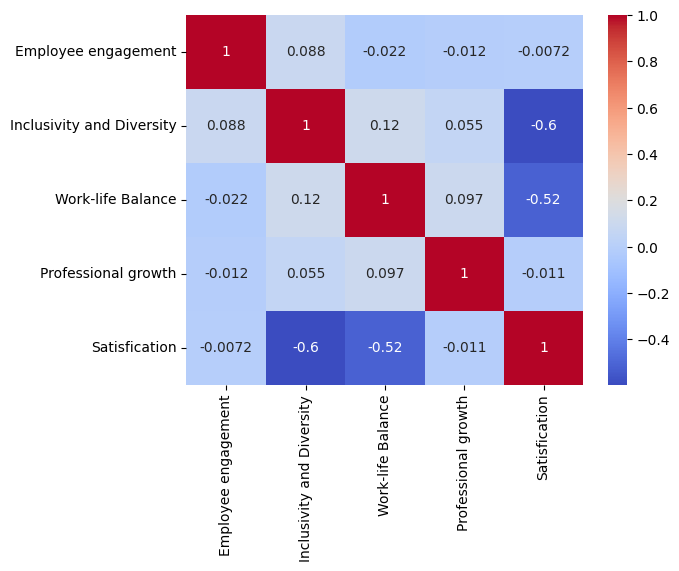

In [55]:
corr = levels[['Employee engagement' , 'Inclusivity and Diversity' , 'Work-life Balance' , 'Professional growth' , 'Satisfication']].corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [51]:
levels['Id'].groupby(levels['Employee engagement']).count()

Employee engagement
0    246
1    204
Name: Id, dtype: int64

In [52]:
levels['Id'].groupby(levels['Inclusivity and Diversity']).count()

Inclusivity and Diversity
0    207
1    243
Name: Id, dtype: int64

In [53]:
levels['Id'].groupby(levels['Work-life Balance']).count()

Work-life Balance
0    246
1    204
Name: Id, dtype: int64

In [54]:
levels['Id'].groupby(levels['Professional growth']).count()

Professional growth
0    189
1    261
Name: Id, dtype: int64